Neural Network

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

Loading data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
forest = pd.read_csv("forestfires.csv")
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


Checking for null values in the data

In [4]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

There are no null values in the data


Distributions of the independant features

<Axes: xlabel='area', ylabel='Density'>

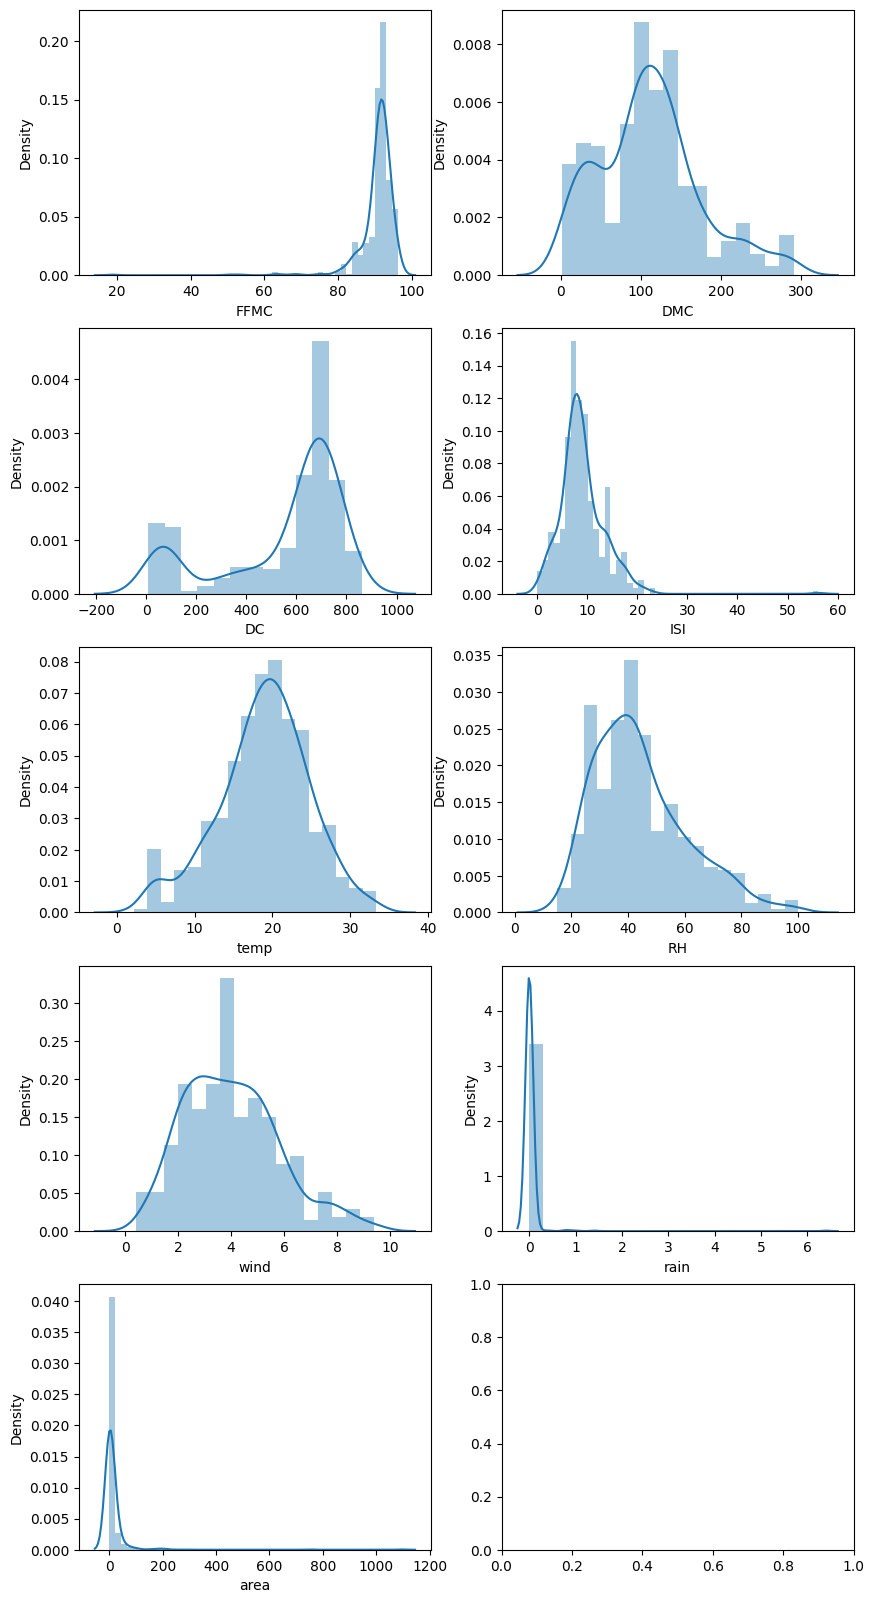

In [5]:
fig,axs=plt.subplots(5,2,figsize=(10,20))
sns.distplot(forest.FFMC,ax=axs[0,0])
sns.distplot(forest.DMC,ax=axs[0,1])
sns.distplot(forest.DC,ax=axs[1,0])
sns.distplot(forest.ISI,ax=axs[1,1])
sns.distplot(forest.temp,ax=axs[2,0])
sns.distplot(forest.RH,ax=axs[2,1])
sns.distplot(forest.wind,ax=axs[3,0])
sns.distplot(forest.rain,ax=axs[3,1])
sns.distplot(forest.area,ax=axs[4,0])

In [6]:
forest.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

Label encoding the size category column

In [7]:
forest.loc[forest.size_category=='small','size_category']=0
forest.loc[forest.size_category=='large','size_category']=1

In [8]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Dropping month and day columns since they are already present as dummy columns

In [9]:
forest.drop(['month','day'],axis=1,inplace=True)

In [10]:
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


Splitting dependant and independant variables

In [11]:
x=forest.iloc[:,:-1]
y=forest.iloc[:,-1]

In [12]:
y




0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: object

In [13]:
y=y.astype('float')

Using standard scaler

In [15]:
ss=preprocessing.StandardScaler()

In [16]:
x=ss.fit_transform(x)

Building model

In [17]:
model=Sequential()
model.add(Dense(28,  activation='relu'))
model.add(Dense(28,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history=model.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 2s 43ms/step - loss: 0.6261 - accuracy: 0.7225 - val_loss: 0.6760 - val_accuracy: 0.6959
Epoch 2/250
7/7 [==============================] - 0s 9ms/step - loss: 0.5856 - accuracy: 0.7543 - val_loss: 0.6779 - val_accuracy: 0.6842
Epoch 3/250
7/7 [==============================] - 0s 11ms/step - loss: 0.5625 - accuracy: 0.7572 - val_loss: 0.6841 - val_accuracy: 0.6725
Epoch 4/250
7/7 [==============================] - 0s 9ms/step - loss: 0.5471 - accuracy: 0.7572 - val_loss: 0.6882 - val_accuracy: 0.6725
Epoch 5/250
7/7 [==============================] - 0s 11ms/step - loss: 0.5357 - accuracy: 0.7572 - val_loss: 0.6911 - val_accuracy: 0.6725
Epoch 6/250
7/7 [==============================] - 0s 13ms/step - loss: 0.5236 - accuracy: 0.7572 - val_loss: 0.6932 - val_accuracy: 0.6725
Epoch 7/250
7/7 [==============================] - 0s 11ms/step - loss: 0.5127 - accuracy: 0.7688 - val_loss: 0.6932 - val_accuracy: 0.6725
Epoch 8/250
7/7 [=====

In [20]:
model.evaluate(x,y)

17/17 [==============================] - 0s 2ms/step - loss: 0.7144 - accuracy: 0.9284


[0.7144497036933899, 0.9284332394599915]

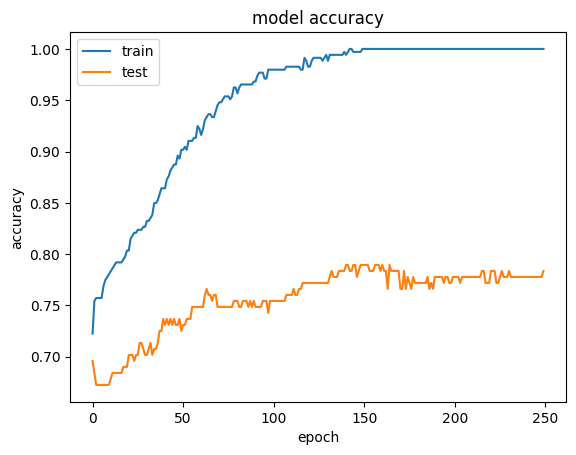

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The model has low validation accuracy


Building a new model with reduced number of hidden layer nodes

In [22]:
model2=Sequential()
model2.add(Dense(28,  activation='relu'))
model2.add(Dense(14,  activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 54ms/step - loss: 0.8160 - accuracy: 0.4306 - val_loss: 0.7396 - val_accuracy: 0.5614
Epoch 2/250
7/7 [==============================] - 0s 9ms/step - loss: 0.7212 - accuracy: 0.4971 - val_loss: 0.6972 - val_accuracy: 0.5789
Epoch 3/250
7/7 [==============================] - 0s 11ms/step - loss: 0.6510 - accuracy: 0.6329 - val_loss: 0.6737 - val_accuracy: 0.5848
Epoch 4/250
7/7 [==============================] - 0s 10ms/step - loss: 0.6036 - accuracy: 0.6908 - val_loss: 0.6603 - val_accuracy: 0.6316
Epoch 5/250
7/7 [==============================] - 0s 11ms/step - loss: 0.5728 - accuracy: 0.7601 - val_loss: 0.6535 - val_accuracy: 0.6433
Epoch 6/250
7/7 [==============================] - 0s 11ms/step - loss: 0.5506 - accuracy: 0.7717 - val_loss: 0.6514 - val_accuracy: 0.6550
Epoch 7/250
7/7 [==============================] - 0s 12ms/step - loss: 0.5355 - accuracy: 0.7803 - val_loss: 0.6512 - val_accuracy: 0.6608
Epoch 8/250
7/7 [====

In [23]:
model2.evaluate(x,y)

17/17 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.9400


[0.3834671080112457, 0.9400386810302734]

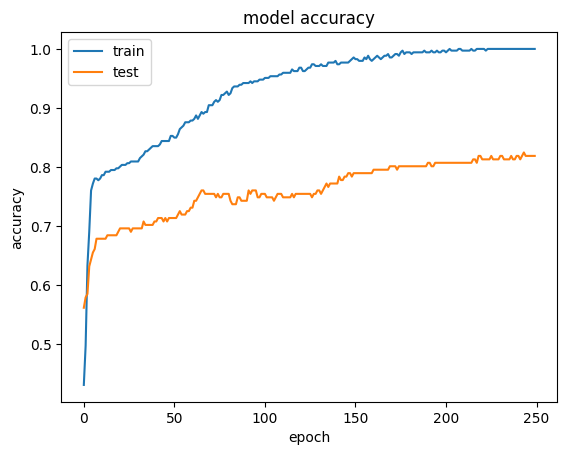

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Validation accuracy didnt improve

In [25]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

Dropping day dummy columns from the data

In [26]:
x=forest.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed','size_category'],axis=1)

In [27]:
y=y=forest.iloc[:,-1]

In [28]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,monthapr,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


Building a new model for the new data

In [29]:
ss=preprocessing.StandardScaler()
x=ss.fit_transform(x)
y=y.astype('float')
model4=Sequential()
model4.add(Dense(21,  activation='relu'))
model4.add(Dense(15,  activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model4.fit(x, y, validation_split=0.33, epochs=250, batch_size=50)

Epoch 1/250
7/7 [==============================] - 1s 37ms/step - loss: 0.8467 - accuracy: 0.2948 - val_loss: 0.7440 - val_accuracy: 0.4152
Epoch 2/250
7/7 [==============================] - 0s 10ms/step - loss: 0.7731 - accuracy: 0.3613 - val_loss: 0.7034 - val_accuracy: 0.4795
Epoch 3/250
7/7 [==============================] - 0s 8ms/step - loss: 0.7171 - accuracy: 0.4595 - val_loss: 0.6765 - val_accuracy: 0.6257
Epoch 4/250
7/7 [==============================] - 0s 10ms/step - loss: 0.6732 - accuracy: 0.6243 - val_loss: 0.6583 - val_accuracy: 0.7018
Epoch 5/250
7/7 [==============================] - 0s 8ms/step - loss: 0.6440 - accuracy: 0.6994 - val_loss: 0.6456 - val_accuracy: 0.7018
Epoch 6/250
7/7 [==============================] - 0s 9ms/step - loss: 0.6213 - accuracy: 0.7399 - val_loss: 0.6372 - val_accuracy: 0.6784
Epoch 7/250
7/7 [==============================] - 0s 9ms/step - loss: 0.6020 - accuracy: 0.7514 - val_loss: 0.6323 - val_accuracy: 0.6842
Epoch 8/250
7/7 [=======

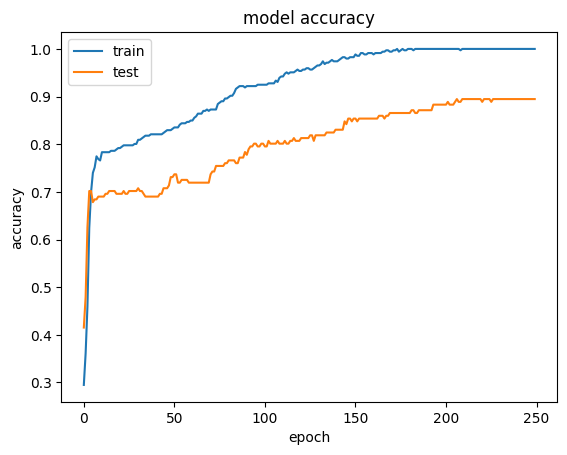

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

From the graph it can be inferred that the validation accuracy improved to 0.91


So model4 is taken as the final model

In [31]:
model_final=model4